<a href="https://colab.research.google.com/github/AzisilhamK463/PCVK_2023/blob/main/week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pertemuan Minggu ke-11**

**Nama: Azis Ilham Kurniawan**

**NIM: 2141720145**

**Kelas: TI-3F**

# Langkah Praktikum

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [14]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

In [21]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/dataset/sliced"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
 src = cv.imread(os.path.join(path_plate, name_file))
 blurred = src.copy()
 gray = blurred.copy()

In [22]:
# Filtering
for i in range(10):
 blurred = cv.GaussianBlur(src, (5, 5), 0.5)

In [24]:
# Ubah ke grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY
+ cv.THRESH_OTSU)
print(ret, bw.shape)

168.0 (300, 493)


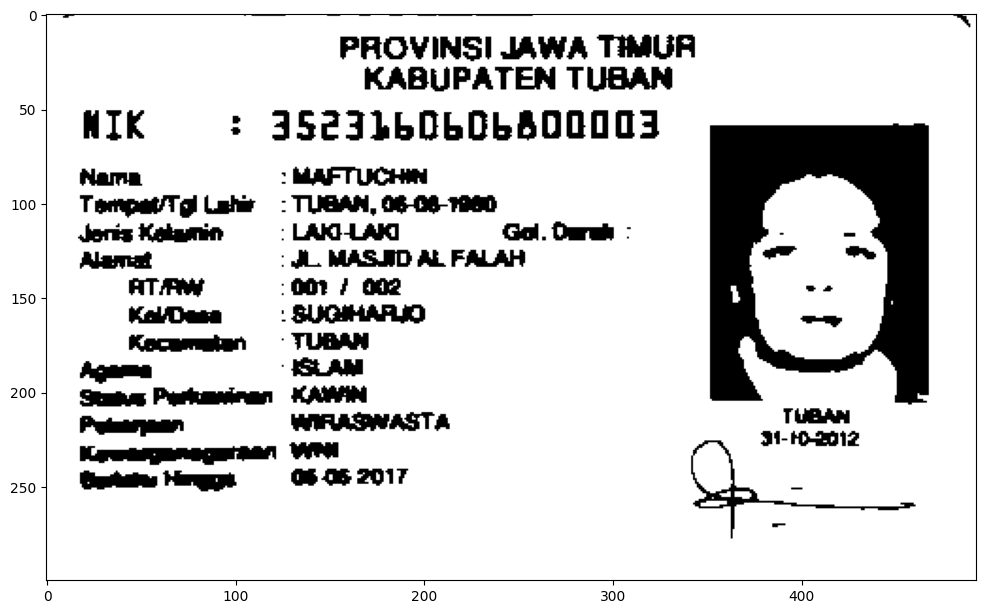

In [25]:
display(bw)

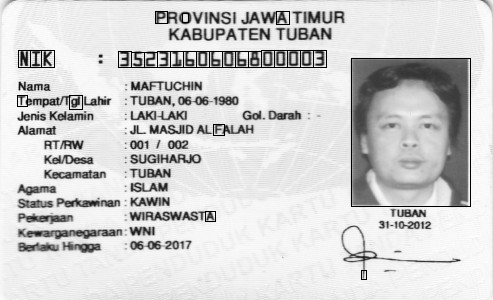

In [67]:
#Erosi Cross SE
def erosi_citra(F,p,l):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv.getStructuringElement(cv.MORPH_RECT,(p,l))
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE

img_e= cv.imread('/content/drive/MyDrive/dataset/sliced/ktp3.png',0)
ret1, thresh1 = cv.threshold(img_e, 127, 225, cv.THRESH_BINARY)
p=3
l=1
imgE = erosi_citra(thresh1,p,l)

# Mengonversi gambar ke skala abu-abu
#gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

# Melakukan operasi thresholding untuk menghasilkan gambar biner
#_, binary_image = cv.threshold(gray, 128, 255, cv.THRESH_BINARY)

# Menemukan kontur pada gambar biner
contours, _ = cv.findContours(imgE, cv.RETR_CCOMP, cv.CHAIN_APPROX_TC89_L1)

# Menggambar kontur pada gambar asli
ktp_ori = img_e.copy()
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 9 and w >= 4 and float(ras) <= 1:
      cv.rectangle(ktp_ori, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 45 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp_ori, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menampilkan gambar dengan kontur
cv2_imshow(ktp_ori)

#**Tugas Praktikum**